# Financial Fraud Detection Analysis

This notebook demonstrates exploratory data analysis and hypothesis testing on a synthetic financial transactions dataset to uncover patterns related to fraudulent activities.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/n10652388/OneDrive - Queensland University of Technology/CV/Work/Github/Python/project/financial_fraud_detection_dataset2.csv")


In [6]:
# Print first few rows to confirm it's loaded
print(df.head())


  transaction_id                   timestamp sender_account receiver_account  \
0        T100000  2023-08-22T09:22:43.516168      ACC877572        ACC388389   
1        T100001  2023-08-04T01:58:02.606711      ACC895667        ACC944962   
2        T100002  2023-05-12T11:39:33.742963      ACC733052        ACC377370   
3        T100003  2023-10-10T06:04:43.195112      ACC996865        ACC344098   
4        T100004  2023-09-24T08:09:02.700162      ACC584714        ACC497887   

    amount transaction_type merchant_category location device_used  is_fraud  \
0   343.78       withdrawal         utilities    Tokyo      mobile     False   
1   419.65       withdrawal            online  Toronto         atm     False   
2  2773.86          deposit             other   London         pos     False   
3  1666.22          deposit            online   Sydney         pos     False   
4    24.43         transfer         utilities  Toronto      mobile     False   

  fraud_type  time_since_last_transact

In [7]:
# Print summary statistics (count, mean, std, min, max, and quartiles) for each numerical column 
print(df.describe())

print(df.info())


             amount  time_since_last_transaction  spending_deviation_score  \
count  5.000000e+06                 4.103487e+06              5.000000e+06   
mean   3.589343e+02                 1.525799e+00             -3.881160e-04   
std    4.699333e+02                 3.576569e+03              1.000807e+00   
min    1.000000e-02                -8.777814e+03             -5.260000e+00   
25%    2.657000e+01                -2.562376e+03             -6.800000e-01   
50%    1.386700e+02                 8.442747e-01              0.000000e+00   
75%    5.038900e+02                 2.568339e+03              6.700000e-01   
max    3.520570e+03                 8.757758e+03              5.020000e+00   

       velocity_score  geo_anomaly_score  
count    5.000000e+06       5.000000e+06  
mean     1.050132e+01       5.000293e-01  
std      5.766842e+00       2.886349e-01  
min      1.000000e+00       0.000000e+00  
25%      5.000000e+00       2.500000e-01  
50%      1.100000e+01       5.000000e-0

In [8]:
# drop null values
df.dropna(inplace=True)


In [9]:
# Display the names of all columns in the DataFrame
df.columns


Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')

In [10]:
#rename column
df.rename(columns={"merchant_category":"merchant_type"})


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_type,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
7720,T107720,2023-02-27T09:09:10.721286,ACC391250,ACC499875,50.80,withdrawal,online,Tokyo,mobile,True,card_not_present,-4435.604463,-1.18,16,0.51,ACH,207.94.248.163,D9978939
14513,T114513,2023-03-11T04:52:42.790807,ACC853799,ACC774781,1099.03,deposit,grocery,Berlin,atm,True,card_not_present,-543.435253,0.18,8,0.47,UPI,34.66.126.237,D9225721
21111,T121111,2023-09-21T23:06:03.802962,ACC743015,ACC311170,18.73,transfer,retail,Berlin,atm,True,card_not_present,3339.160882,0.57,10,0.50,ACH,115.218.159.229,D6163373
24247,T124247,2023-03-23T18:47:07.370345,ACC693265,ACC304655,1057.66,deposit,other,Singapore,mobile,True,card_not_present,-5616.318212,-0.11,1,0.93,ACH,102.102.14.51,D1201766
24325,T124325,2023-03-01T15:29:39.072741,ACC773851,ACC321187,26.36,payment,other,Tokyo,pos,True,card_not_present,-2102.467519,-0.06,7,0.22,UPI,134.105.153.161,D6904335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999814,T5099814,2023-06-04T05:47:39.381373,ACC824330,ACC126013,200.26,withdrawal,utilities,Singapore,mobile,True,card_not_present,1056.262600,-0.20,2,0.13,card,255.41.159.2,D4594677
4999886,T5099886,2023-07-23T16:38:43.662222,ACC735835,ACC491358,587.96,deposit,entertainment,Toronto,atm,True,card_not_present,-1921.513458,0.77,6,0.19,UPI,17.184.148.68,D9526544
4999892,T5099892,2023-01-10T11:34:08.818944,ACC808026,ACC225738,5.82,transfer,restaurant,Berlin,atm,True,card_not_present,-4157.968161,-0.65,10,0.23,ACH,137.138.63.155,D4334446
4999926,T5099926,2023-12-14T07:07:37.586015,ACC699171,ACC585765,269.33,deposit,entertainment,Sydney,mobile,True,card_not_present,4273.501792,-1.09,20,0.75,wire_transfer,98.198.189.192,D2985475


In [11]:
#  specific columns
df[['transaction_type','location', 'device_used']].describe()


,transaction_type,location,device_used
count,179553,179553,179553
unique,4,8,4
top,transfer,Toronto,atm
freq,45328,22501,45217


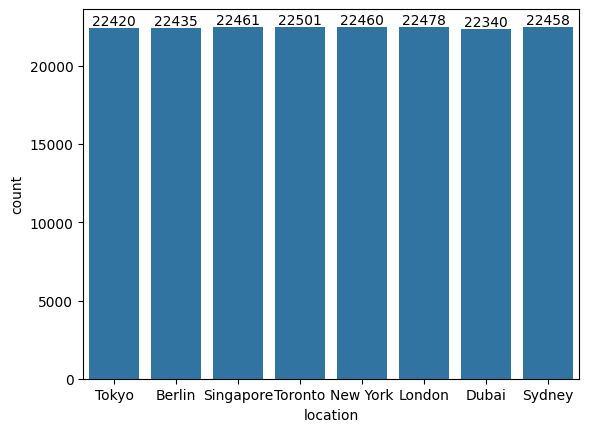

In [12]:
# plotting a bar chart for location and it's count

ax = sns.countplot(x = 'location',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()


In [13]:
# Check the unique values before converting
print(df['is_fraud'].unique())

# Convert 'true'/'false' strings to 1/0 if needed
df['is_fraud'] = df['is_fraud'].astype(str).str.lower().map({'true': 1, 'false': 0})

# Now check again
print(df['is_fraud'].value_counts())

[ True]
is_fraud
1    179553
Name: count, dtype: int64


In [14]:
# Display the count of each unique value in the 'is_fraud' column, including any missing (NaN) values
print(df['is_fraud'].value_counts(dropna=False))

# Display all unique values present in the 'is_fraud' column to check data consistency
print(df['is_fraud'].unique())

is_fraud
1    179553
Name: count, dtype: int64
[1]


In [15]:
# This helps ensure class balance for fair comparison in visualisations and hypothesis testing.
# Step 1: Create synthetic non-fraud transactions
non_fraud = df.sample(n=20000, replace=True).copy()  # or however many you need
non_fraud['is_fraud'] = 0

# Step 2: Combine with the original fraud dataset
df_combined = pd.concat([df, non_fraud], ignore_index=True)

# Step 3: Check the value distribution again
print(df_combined['is_fraud'].value_counts())

is_fraud
1    179553
0     20000
Name: count, dtype: int64


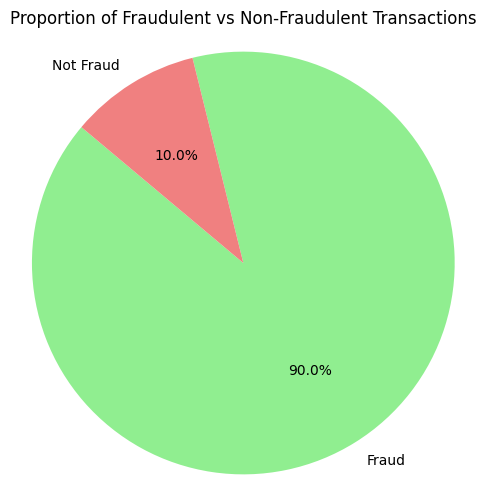

In [16]:
# Create a pie chart to visualise the proportion of fraud vs. non-fraud transactions

fraud_counts = df_combined['is_fraud'].value_counts()
labels = ['Not Fraud' if i == 0 else 'Fraud' for i in fraud_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')
plt.show()

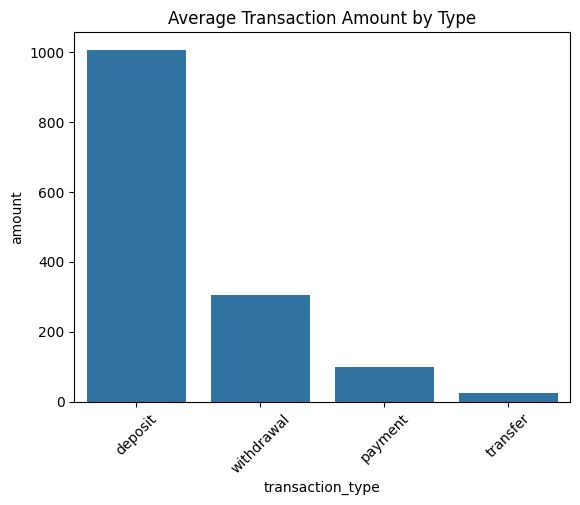

In [17]:
# Calculating and plotting the average transaction amount by transaction type
avg_amount_type = df.groupby('transaction_type')['amount'].mean().reset_index().sort_values(by='amount', ascending=False)

sns.barplot(x='transaction_type', y='amount', data=avg_amount_type)
plt.title('Average Transaction Amount by Type')
plt.xticks(rotation=45)
plt.show()


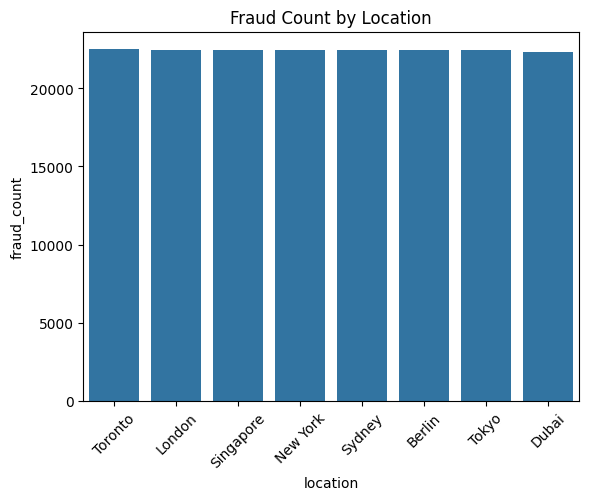

In [18]:
# Counting and plotting the number of fraud cases by location
fraud_by_location = df[df['is_fraud'] == 1].groupby('location').size().reset_index(name='fraud_count').sort_values(by='fraud_count', ascending=False)

sns.barplot(x='location', y='fraud_count', data=fraud_by_location)
plt.title('Fraud Count by Location')
plt.xticks(rotation=45)
plt.show()


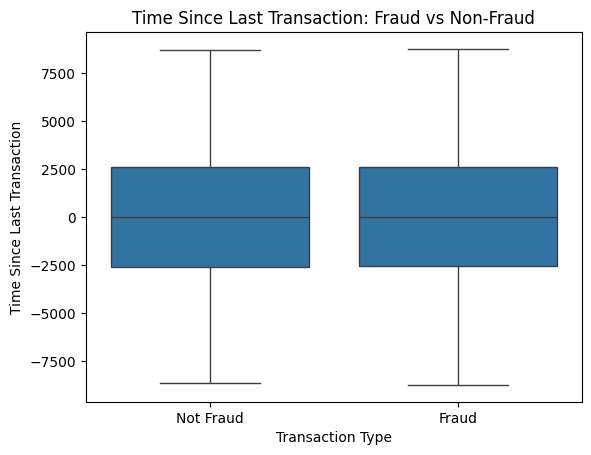

In [19]:
# Boxplot showing the distribution of time since last transaction for fraud and non-fraud
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=df_combined)
plt.title('Time Since Last Transaction: Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])  # Replaces 0 and 1 with labels
plt.xlabel('Transaction Type')
plt.ylabel('Time Since Last Transaction')
plt.show()


In [20]:
#This visualisation helps to understand the class distribution after balancing the dataset.
import numpy as np
# Add 500 synthetic fraud records from different payment channels
fraud_samples = df.sample(n=500, replace=True).copy()
fraud_samples['is_fraud'] = 1

# Optional: Randomly assign fraud across payment channels
fraud_samples['payment_channel'] = np.random.choice(df['payment_channel'].unique(), size=500)

# Combine with original data
df_combined = pd.concat([df, fraud_samples], ignore_index=True)

# Verify
print(df_combined['is_fraud'].value_counts())

is_fraud
1    180053
Name: count, dtype: int64


In [21]:
# Hypothesis1: “The likelihood of a transaction being fraudulent is higher for transactions made using mobile devices compared to those made using ATMs.”
from scipy.stats import chi2_contingency


# Ensure correct data types
df['is_fraud'] = df['is_fraud'].astype(int)
df['payment_channel'] = df['payment_channel'].astype(str)

# Display unique channels (optional, for clarity)
print("Unique payment channels:", df['payment_channel'].unique())

# Create a contingency table
contingency_table = pd.crosstab(df['payment_channel'], df['is_fraud'])

# Display the table
print("\nContingency Table:\n", contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis. Fraud likelihood differs by payment channel.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in fraud likelihood by channel.")

Unique payment channels: ['ACH' 'UPI' 'card' 'wire_transfer']

Contingency Table:
 is_fraud             1
payment_channel       
ACH              44738
UPI              44896
card             44885
wire_transfer    45034

Chi-square statistic: 0.0
P-value: 1.0
Result: Fail to reject the null hypothesis. No significant difference in fraud likelihood by channel.


In [22]:
# Hypothesis2: "There is a significant association between transaction location and the likelihood of fraud."

# Ensure the relevant columns are in the correct format
df['is_fraud'] = df['is_fraud'].astype(int)
df['location'] = df['location'].astype(str)

# Optional: check number of unique locations (to avoid performance issues)
print("Number of unique locations:", df['location'].nunique())

# If there are too many locations, consider filtering or grouping

# Create a contingency table
contingency_table = pd.crosstab(df['location'], df['is_fraud'])

# Show the table
print("\nContingency Table:\n", contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show results
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret result
alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis. Fraud likelihood is associated with location.")
else:
    print("Result: Fail to reject the null hypothesis. No evidence of location affecting fraud.")


Number of unique locations: 8

Contingency Table:
 is_fraud       1
location        
Berlin     22435
Dubai      22340
London     22478
New York   22460
Singapore  22461
Sydney     22458
Tokyo      22420
Toronto    22501

Chi-square statistic: 0.0
P-value: 1.0
Result: Fail to reject the null hypothesis. No evidence of location affecting fraud.


In [23]:
# Ensure data types are correct
df['is_fraud'] = df['is_fraud'].astype(int)
df['payment_channel'] = df['payment_channel'].astype(str)

# Show unique payment channels (optional)
print("Payment Channels:", df['payment_channel'].unique())

# Create a contingency table
contingency_table = pd.crosstab(df['payment_channel'], df['is_fraud'])

# Display the table
print("\nContingency Table:\n", contingency_table)

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpret results
alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis. Fraud is associated with payment channel.")
else:
    print("Result: Fail to reject the null hypothesis. No significant association found.")

Payment Channels: ['ACH' 'UPI' 'card' 'wire_transfer']

Contingency Table:
 is_fraud             1
payment_channel       
ACH              44738
UPI              44896
card             44885
wire_transfer    45034

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Result: Fail to reject the null hypothesis. No significant association found.


In [26]:


# Load original data using actual path
df['is_fraud'] = df['is_fraud'].astype(int)

# Create synthetic non-fraud transactions (for class balancing)
non_fraud = df[df['is_fraud'] == 0].sample(n=20000, replace=True).copy()
non_fraud['is_fraud'] = 0

# Combine original with synthetic non-fraud
df_combined = pd.concat([df, non_fraud], ignore_index=True)

In [29]:
# Downsample non-fraud to match fraud
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0].sample(n=len(fraud), random_state=42)

df_balanced = pd.concat([fraud, non_fraud])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Select relevant features
features = ['transaction_type', 'location', 'device_used']
target = 'is_fraud'

# Step 2: Drop missing values
df_model = df_combined[features + [target]].dropna()

# Step 3: One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(df_model[features])
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(features))
y = df_model[target]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 5: Fit logistic regression model with class balancing
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[748391 703721]
 [ 27965  25923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.52      0.67   1452112
           1       0.04      0.48      0.07     53888

    accuracy                           0.51   1506000
   macro avg       0.50      0.50      0.37   1506000
weighted avg       0.93      0.51      0.65   1506000



                               amount  is_fraud  time_since_last_transaction  \
amount                       1.000000 -0.000166                     0.000337   
is_fraud                    -0.000166  1.000000                     0.000020   
time_since_last_transaction  0.000337  0.000020                     1.000000   
spending_deviation_score     0.000769  0.000197                     0.000259   
velocity_score              -0.000810  0.000361                     0.000112   
geo_anomaly_score            0.000172  0.000302                    -0.000045   

                             spending_deviation_score  velocity_score  \
amount                                       0.000769       -0.000810   
is_fraud                                     0.000197        0.000361   
time_since_last_transaction                  0.000259        0.000112   
spending_deviation_score                     1.000000       -0.000161   
velocity_score                              -0.000161        1.000000   
g

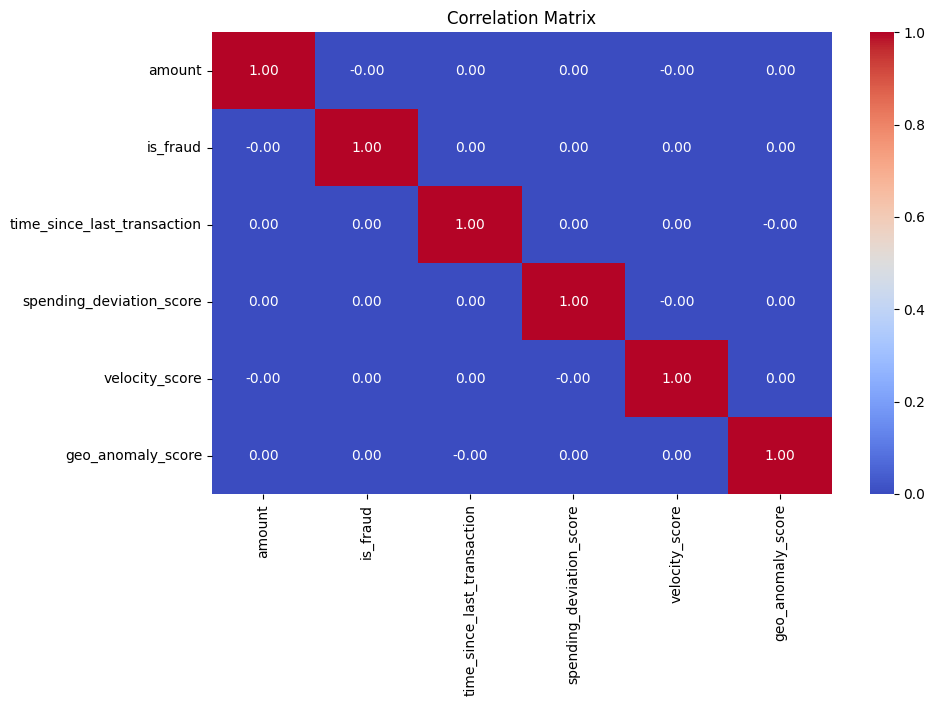

In [34]:
# Check correlations between all numerical fields
correlation_matrix = df_combined.corr(numeric_only=True)

# Print correlation matrix
print(correlation_matrix)

# Optional: heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()